<h1>Data Cleaning - using Car Pricing Dataset</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

<h3>Import Datasets</h3>

In [2]:
Data = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [3]:
df = pd.read_csv(Data)
df.head(4)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h3>naming Columns</h3>

In [4]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [5]:
df = pd.read_csv(Data, names = headers)
df.head(4)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


<h3>Handling missing values</h3>

In [6]:
df.replace('?',np.nan, inplace = True)
df.head(4)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


<h3>Checking for Null values</h3>

In [7]:
missing_values = df.isnull().sum()
missing_values

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
average = df[['normalized-losses','bore','stroke','horsepower','peak-rpm']].astype('float').mean()
average

normalized-losses     122.000000
bore                    3.329751
stroke                  3.255423
horsepower            104.256158
peak-rpm             5125.369458
dtype: float64

In [12]:
replaced_data = df[['normalized-losses','bore','stroke','horsepower','peak-rpm']].replace(np.nan, average)
df.fillna(replaced_data, inplace = True)
df.dropna(subset = ['price'], axis = 0, inplace = True )
df.reset_index(drop = True, inplace = True)
df.head(4)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


<h3>Data Formatting</h3>

In [13]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [14]:
df[['bore','stroke','price','peak-rpm']] = df[['bore','stroke','price','peak-rpm']].astype('float')

In [16]:
df['normalized-losses'] = df['normalized-losses'].astype('int')

<h3>Formatted Data</h3>

In [17]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<h3>Transform mpg into L/100km</h3>

In [20]:
#To convert mpg into L/100km
df['city-mpg'] = 235/df['city-mpg']
df.rename(columns = {'city-mpg':'city-L/100km'},inplace = True)

In [21]:
df['highway-mpg'] = 235/df['highway-mpg']
df.rename(columns = {'highway-mpg':'highway-L/100km'},inplace = True)

In [23]:
#Transformed Data
df.head(4)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19.0,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,7.833333,13950.0


<h3>Data Normalization</h3>
<p>normalize those variables so their value ranges from 0 to 1</p>

In [27]:
df['length'] = df['length']/df['length'].max()
df['height'] = df['height']/df['height'].max()
df['width'] = df['width']/df['width'].max()
df[['length','height','width']].head(4)

,length,height,width
0,0.811148,0.816054,0.890278
1,0.811148,0.816054,0.890278
2,0.822681,0.876254,0.909722
3,0.848630,0.908027,0.919444


<h3>Binning Data</h3>
<p>In our data set, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values.</p>
<p>To Simplify Data Analysis we create three bins ranging the horsepower as "Low", "Medium", "High"</p>

(array([44., 45., 48., 24., 14., 16.,  5.,  4.,  0.,  1.]),
 array([ 48. ,  69.4,  90.8, 112.2, 133.6, 155. , 176.4, 197.8, 219.2,
        240.6, 262. ]),
 <BarContainer object of 10 artists>)

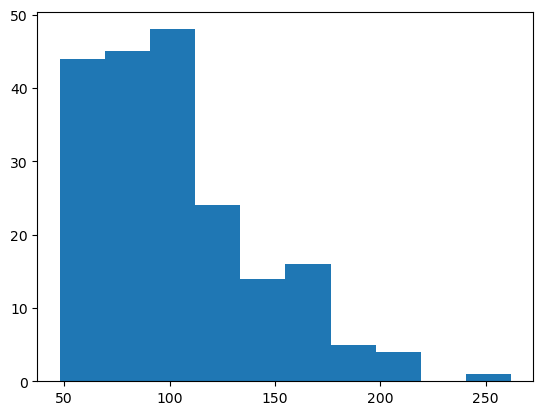

In [31]:
#To plot the graph we must convert horsepower data type to correct datatype
df['horsepower'] = df['horsepower'].astype(int, copy = True)
plt.hist(df['horsepower'])

<p>Find 3 bins of equal size bandwidth by using Numpy's linspace(start_value, end_value, numbers_generated function.

Since we want to include the minimum value of horsepower, set start_value = min(df["horsepower"]).

Since we want to include the maximum value of horsepower, set end_value = max(df["horsepower"]).

Since we are building 3 bins of equal length, you need 4 dividers, so numbers_generated = 4.</p>

In [39]:
# Build a bin array with a minimum value to a maximum value by using the bandwidth calculated above.
#The values will determine when one bin ends and another begins.

bins = np.linspace(min(df['horsepower']),max(df['horsepower']),4)
print('Bins =',bins)

Bins = [ 48.         119.33333333 190.66666667 262.        ]


In [38]:
# Now to group the binned values we must name the binned group
# define group names
group_names = ['Low','Medium','High']

In [40]:
group_names = ['Low','Medium','High']

<p>Apply the function "cut" to determine what each value of `df['horsepower']` belongs to. 
</p>

In [45]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels = group_names)
df[['horsepower','horsepower-binned']].head(4)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low


In [46]:
#see the number of vehicles in each bin
df['horsepower-binned'].value_counts()

horsepower-binned
Low       152
Medium     43
High        5
Name: count, dtype: int64

<p>Plot the distribution of each bin</p>

Text(0.5, 1.0, 'horsepower bins')

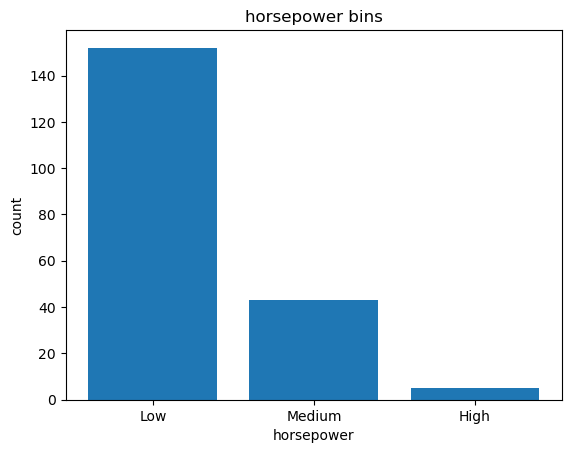

In [48]:
plt.bar(group_names, df["horsepower-binned"].value_counts())
plt.plt.xlabel("horsepower")
plt.plt.ylabel("count")
plt.plt.title("horsepower bins")

<h3>Bins Visualization</h3>

Text(0.5, 1.0, 'horsepower bins')

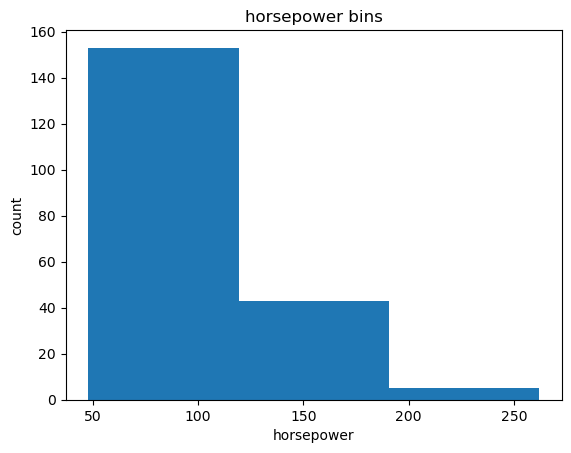

In [50]:
plt.hist(df["horsepower"], bins = 3)
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

<h3>Dummie Variables</h3>
<p>The column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, you can convert "fuel-type" to Dummie variables.</p>

In [56]:
#to create dummie variable we use pandas pd.get_dummies

dummie_variable1 = pd.get_dummies(df['fuel-type'])
dummie_variable1.head(4)

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True


In [58]:
dummie_variable1.rename(columns = {'diesel': 'fuel-type-diesel', 'gas': 'fuel-type-gas'}, inplace = True)
dummie_variable1.head(4)

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True


In [60]:
dummie_variable2 = pd.get_dummies(df['aspiration'])
dummie_variable2.head(3)

,std,turbo
0,True,False
1,True,False
2,True,False


In [61]:
df = pd.concat([df, dummie_variable1, dummie_variable2], axis =1)



In [62]:
df.drop("fuel-type", axis = 1, inplace = True)
df.drop("aspiration", axis = 1, inplace = True)

In [63]:
df.head(4)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21.0,8.703704,13495.0,Low,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21.0,8.703704,16500.0,Low,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,19.0,9.038462,16500.0,Medium,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,24.0,7.833333,13950.0,Low,False,True,True,False


In [64]:
df.to_csv('clean_car_pricing.csv')